In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import matplotlib.patches as patches
from salishsea_tools import viz_tools, geo_tools, tidetools
from bathy_helpers import *
import matplotlib.path as mpltPath
from fast_ll2ij_SalishSea201702 import *
from scipy.optimize import curve_fit

In [2]:
grid = nc.Dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc')

# 395 particles were released in the domain marked by the black box. All of the particles were released at depths between 30 and 40 m.

Each simulation started at the beginning of the month and ran until the end of the month. Velocities were taken from hindcast files. 

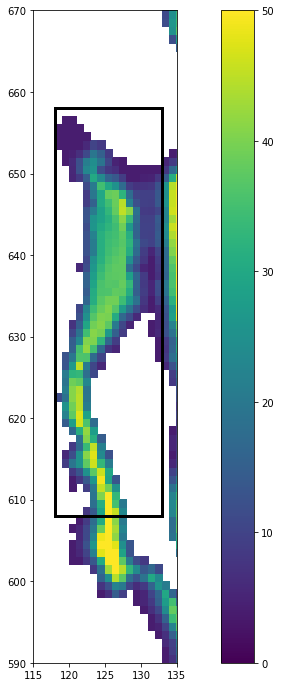

In [6]:
fig, ax = plt.subplots(1,1, figsize=(16,12))
bathy = ax.pcolormesh(grid.variables['Bathymetry'][:], vmin = 0, vmax = 50)
ax.set_ylim(590,670)
ax.set_xlim(115,135)
viz_tools.set_aspect(ax)
ax.add_patch(patches.Rectangle((118,608), 15, 50, fill=False, linewidth=3))
fig.colorbar(bathy, ax=ax)

In [3]:
def still_inside(il, ir, jl, jr, lont, latt):
    p = makebox(glamfe,gphife,il,ir,jl,jr)
    poly = path.Path(p, closed=True) 
    time, particles = lont.shape
    number_of_particles = np.zeros(time)
    for l in range(time):
        cx = lont[l,:]
        cy = latt[l,:]
        pts = np.array([cx,cy]).T
        test = poly.contains_points(pts)
        number_of_particles[l]= sum(test) / particles
    return number_of_particles
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

In [6]:
Jul = nc.Dataset('/ocean/vdo/MEOPAR/ariane-runs/for_debby/monthlong/ariane_trajectories_qualitative.nc')
Jul_latt = Jul.variables['traj_lat']
Jul_lont = Jul.variables['traj_lon']
Oct = nc.Dataset('/ocean/vdo/MEOPAR/ariane-runs/for_debby/Oct16/ariane_trajectories_qualitative.nc')
Oct_latt = Oct.variables['traj_lat']
Oct_lont = Oct.variables['traj_lon']
Jan = nc.Dataset('/ocean/vdo/MEOPAR/ariane-runs/for_debby/Jan17/ariane_trajectories_qualitative.nc')
Jan_latt = Jan.variables['traj_lat']
Jan_lont = Jan.variables['traj_lon']
Apr = nc.Dataset('/ocean/vdo/MEOPAR/ariane-runs/for_debby/Apr17/ariane_trajectories_qualitative.nc')
Apr_latt = Apr.variables['traj_lat']
Apr_lont = Apr.variables['traj_lon']
with nc.Dataset('/home/mdunphy/MEOPAR/NEMO-forcing/grid/coordinates_seagrid_SalishSea201702.nc', 'r') as cnc:
    glamf = cnc.variables['glamf'][0,...]; gphif = cnc.variables['gphif'][0,...]
    glamt = cnc.variables['glamt'][0,...]; gphit = cnc.variables['gphit'][0,...]
NY, NX = glamt.shape[0], glamt.shape[1]
glamfe, gphife = expandf(glamf, gphif)

In [14]:
Jul_all = still_inside(118,134,608,658,Jul_lont, Jul_latt)
Oct_all = still_inside( 118,134,608,658,Oct_lont, Oct_latt)
Jan_all = still_inside( 118,134,608,658, Jan_lont, Jan_latt)
Apr_all = still_inside( 118,134,608,658, Apr_lont, Apr_latt)

# Plot shows fraction of particles still in the domain released. 

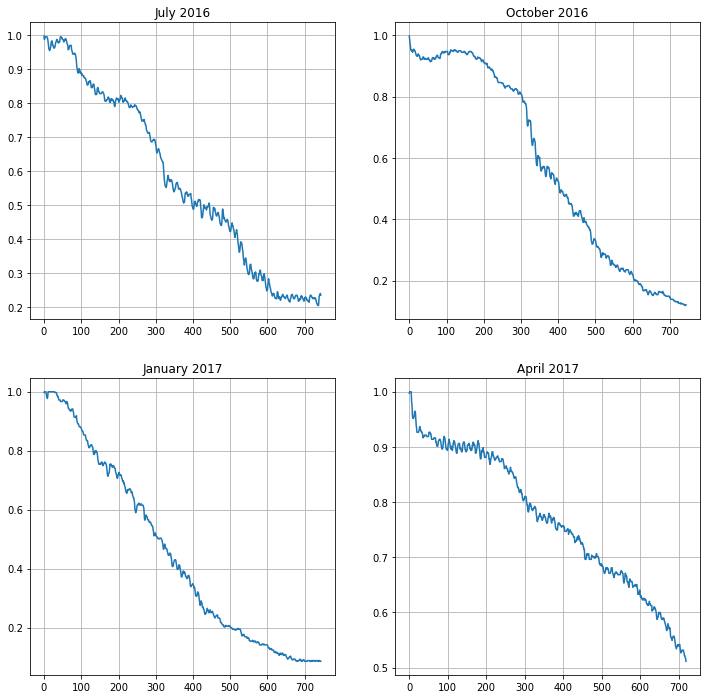

In [18]:
fig,ax = plt.subplots(2,2,figsize=(12,12))
ax[0,0].plot(range(744), Jul_all)
ax[0,0].grid('on')
ax[0,0].set_title('July 2016')
ax[0,1].plot(range(744), Oct_all)
ax[0,1].grid('on')
ax[0,1].set_title('October 2016')
ax[1,0].plot(range(744), Jan_all)
ax[1,0].grid('on')
ax[1,0].set_title('January 2017')
ax[1,1].plot(range(720), Apr_all)
ax[1,1].grid('on')
ax[1,1].set_title('April 2017')

In [4]:
short = nc.Dataset('/ocean/vdo/MEOPAR/ariane-runs/for_debby/smaller_domain/monthlong/ariane_trajectories_qualitative.nc')

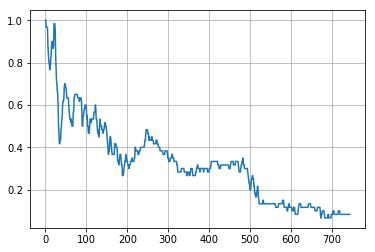

In [8]:
al_l = still_inside(118,132,615,633,short.variables['traj_lon'], short.variables['traj_lat'])
plt.plot(range(744), al_l)
plt.grid('on')

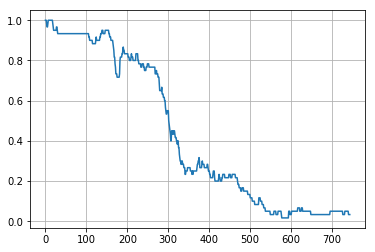

In [10]:
short1 = nc.Dataset('/ocean/vdo/MEOPAR/ariane-runs/for_debby/smaller_domain/Oct16/ariane_trajectories_qualitative.nc')
al_l = still_inside(118,132,615,633,short1.variables['traj_lon'], short1.variables['traj_lat'])
plt.plot(range(744), al_l)
plt.grid('on')

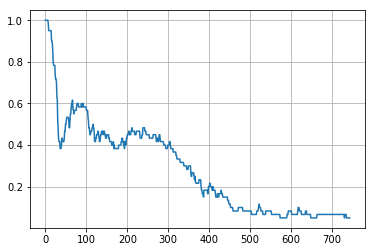

In [11]:
short2 = nc.Dataset('/ocean/vdo/MEOPAR/ariane-runs/for_debby/smaller_domain/Jan17/ariane_trajectories_qualitative.nc')
al_l = still_inside(118,132,615,633,short2.variables['traj_lon'], short2.variables['traj_lat'])
plt.plot(range(744), al_l)
plt.grid('on')

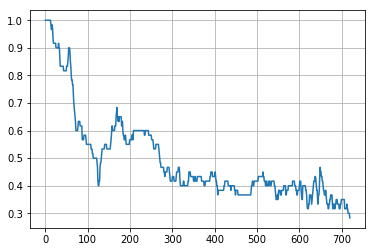

In [12]:
short3 = nc.Dataset('/ocean/vdo/MEOPAR/ariane-runs/for_debby/smaller_domain/Apr17/ariane_trajectories_qualitative.nc')
al_l = still_inside(118,132,615,633,short3.variables['traj_lon'], short3.variables['traj_lat'])
plt.plot(range(720), al_l)
plt.grid('on')